In [1]:
from kalkulator import Kalkulator
from mytypes import *


In [2]:
kredyt1=Kalkulator(kwota_kredytu=400000,ilosc_lat=30,stopa_procentowa=6.6,rodzaj_rat=RodzajRat.rowne,wskaznikBGK=7.14)

In [3]:
df=kredyt1.harmonogram_to_DF()
df

,Numer raty,Kapitał na początku okresu,Rata kapitałowa,Rata odsetkowa,Dopłata,Rata łączna,Kapitał na koniec okresu
0,1,400000.00,354.64,2200.00,1713.33,2554.64,399645.36
1,2,399645.36,356.59,2198.05,1711.81,2554.64,399288.77
2,3,399288.77,358.55,2196.09,1710.29,2554.64,398930.22
3,4,398930.22,360.52,2194.12,1708.75,2554.64,398569.70
4,5,398569.70,362.51,2192.13,1707.21,2554.64,398207.19
...,...,...,...,...,...,...,...
354,355,15031.79,2471.97,82.67,0.00,2554.64,12559.82
355,356,12559.82,2485.56,69.08,0.00,2554.64,10074.26
356,357,10074.26,2499.23,55.41,0.00,2554.64,7575.03
357,358,7575.03,2512.98,41.66,0.00,2554.64,5062.05


In [4]:
import math
df['rok']=df['Numer raty'].apply(lambda x:math.ceil(x/12))
# show=df.groupby('rok')[['Rata odsetkowa','Rata kapitałowa']].sum()
# show.reset_index(inplace=True)
show = df[df['Numer raty']%12==0]


Text(0, 0.5, 'Number of Customers')

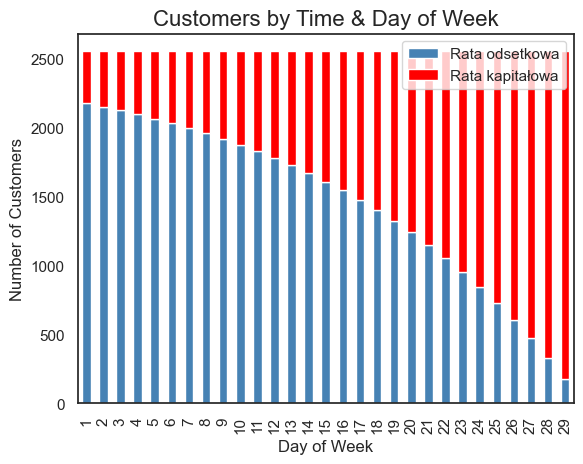

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')

#create stacked bar chart
show.plot(kind='bar',x='rok',y=['Rata odsetkowa','Rata kapitałowa'], stacked=True, color=['steelblue', 'red'])

#add overall title
plt.title('Customers by Time & Day of Week', fontsize=16)

#add axis titles
plt.xlabel('Day of Week')
plt.ylabel('Number of Customers')

#rotate x-axis labels
# plt.xticks(rotation=45)

In [6]:
kredyt2=Kalkulator(kwota_kredytu=400000,ilosc_lat=20,stopa_procentowa=8.46,rodzaj_rat=RodzajRat.malejace)
df=kredyt2.harmonogram_to_DF()
df['rok']=df['Numer raty'].apply(lambda x:math.ceil(x/12))
show=df.groupby('rok')[['Rata odsetkowa','Rata kapitałowa']].sum()
show.reset_index(inplace=True)

<Axes: xlabel='rok'>

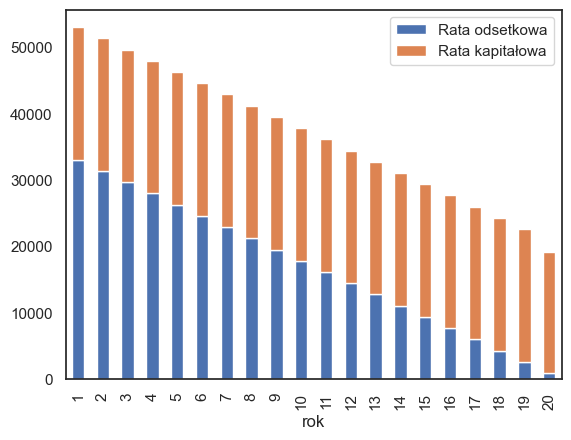

In [7]:
show.plot(kind='bar',x='rok',y=['Rata odsetkowa','Rata kapitałowa'], stacked=True)


In [8]:
gov=7.14
ile=25
bgk=7.14
kredyt=290000*0.963

# PEAKO
gov=7.14
ile=27
bgk=7.14
kredyt=335094

kredyt3=Kalkulator(kwota_kredytu=kredyt,ilosc_lat=ile,stopa_procentowa=gov,rodzaj_rat=RodzajRat.malejace,wskaznikBGK=bgk)
df=kredyt3.harmonogram_to_DF()
df['Odsetki_po'] = df['Rata odsetkowa']-df['Dopłata']
df['po_laczna'] = df['Rata kapitałowa']+df['Odsetki_po']


In [9]:
df

,Numer raty,Kapitał na początku okresu,Rata kapitałowa,Rata odsetkowa,Dopłata,Rata łączna,Kapitał na koniec okresu,Odsetki_po,po_laczna
0,1,335094.00,1034.24,1993.81,1435.32,3028.05,334059.76,558.49,1592.73
1,2,334059.76,1034.24,1987.66,1430.89,3021.90,333025.52,556.77,1591.01
2,3,333025.52,1034.24,1981.50,1426.46,3015.74,331991.28,555.04,1589.28
3,4,331991.28,1034.24,1975.35,1422.03,3009.59,330957.04,553.32,1587.56
4,5,330957.04,1034.24,1969.19,1417.60,3003.43,329922.80,551.59,1585.83
...,...,...,...,...,...,...,...,...,...
318,319,6205.68,1034.24,36.92,0.00,1071.16,5171.44,36.92,1071.16
319,320,5171.44,1034.24,30.77,0.00,1065.01,4137.20,30.77,1065.01
320,321,4137.20,1034.24,24.62,0.00,1058.86,3102.96,24.62,1058.86
321,322,3102.96,1034.24,18.46,0.00,1052.70,2068.72,18.46,1052.70


In [10]:
round(df['Dopłata'].sum())

140608

<Axes: xlabel='Numer raty'>

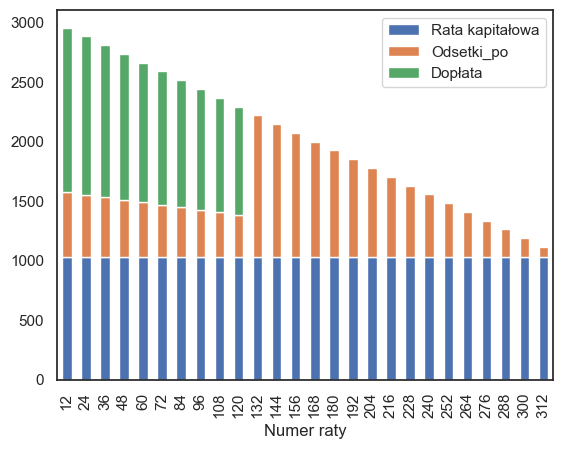

In [11]:
show = df[df['Numer raty']%12==0]
show.plot(kind='bar',x='Numer raty',y=['Rata kapitałowa','Odsetki_po','Dopłata'], stacked=True)

In [12]:
po=df.loc[120,'Kapitał na początku okresu']
ile=ile-10
kredyt3po=Kalkulator(kwota_kredytu=po,ilosc_lat=ile,stopa_procentowa=gov,rodzaj_rat=RodzajRat.rowne)

dfpo=kredyt3po.harmonogram_to_DF()
display(dfpo['Rata odsetkowa'].sum())
dfpo

153881.93999999997

,Numer raty,Kapitał na początku okresu,Rata kapitałowa,Rata odsetkowa,Dopłata,Rata łączna,Kapitał na koniec okresu
0,1,210985.20,533.25,1255.36,903.72,1788.61,210451.95
1,2,210451.95,536.42,1252.19,901.44,1788.61,209915.53
2,3,209915.53,539.61,1249.00,899.14,1788.61,209375.92
3,4,209375.92,542.82,1245.79,896.83,1788.61,208833.10
4,5,208833.10,546.05,1242.56,894.50,1788.61,208287.05
...,...,...,...,...,...,...,...
198,199,10512.92,1726.06,62.55,0.00,1788.61,8786.86
199,200,8786.86,1736.33,52.28,0.00,1788.61,7050.53
200,201,7050.53,1746.66,41.95,0.00,1788.61,5303.87
201,202,5303.87,1757.05,31.56,0.00,1788.61,3546.82


In [13]:
# PEAKO
gov=7.14
ile=27
bgk=7.14
kredyt=335094

kredyt4=Kalkulator(kwota_kredytu=kredyt,ilosc_lat=ile,stopa_procentowa=gov,rodzaj_rat=RodzajRat.bezpieczny,wskaznikBGK=bgk)
df=kredyt4.harmonogram_to_DF()
df['Odsetki_po'] = df['Rata odsetkowa']-df['Dopłata']
df['po_laczna'] = df['Rata kapitałowa']+df['Odsetki_po']
df

,Numer raty,Kapitał na początku okresu,Rata kapitałowa,Rata odsetkowa,Dopłata,Rata łączna,Kapitał na koniec okresu,Odsetki_po,po_laczna
0,1,335094.00,1034.24,1993.81,0.0,3028.05,334059.76,1993.81,3028.05
1,2,334059.76,1034.24,1987.66,0.0,3021.90,333025.52,1987.66,3021.90
2,3,333025.52,1034.24,1981.50,0.0,3015.74,331991.28,1981.50,3015.74
3,4,331991.28,1034.24,1975.35,0.0,3009.59,330957.04,1975.35,3009.59
4,5,330957.04,1034.24,1969.19,0.0,3003.43,329922.80,1969.19,3003.43
...,...,...,...,...,...,...,...,...,...
318,319,0.24,0.00,0.00,0.0,0.00,0.24,0.00,0.00
319,320,0.24,0.00,0.00,0.0,0.00,0.24,0.00,0.00
320,321,0.24,0.00,0.00,0.0,0.00,0.24,0.00,0.00
321,322,0.24,0.00,0.00,0.0,0.00,0.24,0.00,0.00


<Axes: xlabel='Numer raty'>

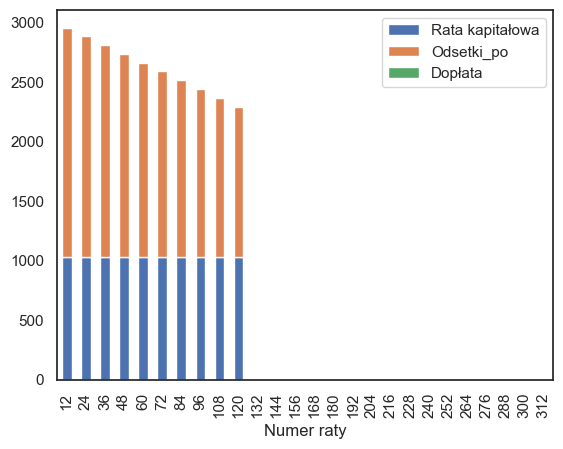

In [14]:
show = df[df['Numer raty']%12==0]
show.plot(kind='bar',x='Numer raty',y=['Rata kapitałowa','Odsetki_po','Dopłata'], stacked=True)